Zadania podstawowe

    Wczytaj dane do DataFrame i wyświetl pierwsze 10 wierszy.
    Sprawdź typy danych w każdej kolumnie i zastanów się, czy jakieś kolumny wymagają konwersji typów.
    Sprawdź, czy w danych występują brakujące wartości i zastanów się, jak można by je obsłużyć.

Zadania na zrozumienie danych

    Podaj statystyki podstawowe dla kolumn numerycznych (np. średnia, mediana, maksimum, minimum).
    Wyświetl rozkład wartości dla kolumny fall (czyli ile jest meteorytów, które spadły, a ile które zostały znalezione).
    Znajdź 5 największych meteorytów pod względem masy.

Zadania na manipulację danymi

    Dodaj nową kolumnę, która będzie zawierała wiek meteorytu w latach od momentu upadku/znalezienia do 2023 roku.
    Przekonwertuj kolumnę year na format daty i sprawdź, jakie są najstarsze i najnowsze meteoryty w zbiorze.
    Usuń wiersze, które mają brakujące wartości w kluczowych kolumnach (np. mass, year).

Zadania zaawansowane

    Utwórz nową kolumnę hemisphere, która wskaże, czy meteoryt spadł na półkuli północnej czy południowej, na podstawie kolumny reclat.
    Zgrupuj dane według klasy meteorytu (recclass) i policz, ile jest meteorytów w każdej grupie.
    Stwórz wizualizację, która pokaże, w których latach spadło najwięcej meteorytów.
    

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('meteorite-landings.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [5]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [6]:
df[['reclat','reclong','GeoLocation']] = df[['reclat','reclong','GeoLocation']].fillna('0')

In [7]:
df = df.loc[~(df['year'].isna()) & ~(df['mass'].isna())]
df.isna().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [8]:
df.describe()

,id,mass,year
count,45311.000000,4.531100e+04,45311.000000
mean,26805.291408,1.331468e+04,1991.947165
std,16834.715854,5.767141e+05,24.798784
min,1.000000,0.000000e+00,601.000000
25%,12649.500000,7.120000e+00,1987.000000
50%,24166.000000,3.210000e+01,1998.000000
75%,40526.500000,2.000000e+02,2003.000000
max,57458.000000,6.000000e+07,2101.000000


In [9]:
df['fall'].value_counts()

fall
Found    44236
Fell      1075
Name: count, dtype: int64

In [10]:
df.sort_values(by='mass', ascending=False).head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16383,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.583330, 17.916670)"
5336,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,76.13333,-64.93333,"(76.133330, -64.933330)"
5329,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.466670, -60.583330)"
5333,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,35.05,-111.03333,"(35.050000, -111.033330)"
3433,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,47.0,88.0,"(47.000000, 88.000000)"


In [11]:
df.loc[ : ,'year'] = df['year'].astype('int')

In [12]:
df['age'] = 2023 - df['year']

In [13]:
df['age'].max().astype('int')

1422

In [14]:
df.loc[:, 'year'] = df.loc[:, 'year'].astype('int')

In [15]:
df.loc[(df['age'] == df['age'].max()) | (df['age'] == df['age'].min())]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,age
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.000000, 0.000000)",-78.0
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,49.41667,21.7,"(49.416670, 21.700000)",1422.0


In [16]:
df['reclat'] = df['reclat'].astype(float)

In [17]:

def hemisphere(row):
    if row > 0:
        return 'North'
    elif row < 0:
        return 'South'
    else:
        return None
    
df.loc[:,'hemisphere'] = df['reclat'].apply(hemisphere)
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,age,hemisphere
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",143.0,North
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",72.0,North
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.0,"(54.216670, -113.000000)",71.0,North
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.9,"(16.883330, -99.900000)",47.0,North
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95,"(-33.166670, -64.950000)",121.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.0185,"(29.037000, 17.018500)",33.0,North
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)",24.0,North
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)",84.0,North
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.5046,"(49.789170, 41.504600)",20.0,North


In [18]:
df.groupby('recclass')[['recclass']].count()

,recclass
recclass,
Acapulcoite,53
Acapulcoite/Lodranite,6
Acapulcoite/lodranite,2
Achondrite-prim,9
Achondrite-ung,56
...,...
Stone-ung,1
Ureilite,300
Ureilite-an,4


In [19]:
df.loc[df['recclass'] == 'Ureilite']

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,age,hemisphere
267,Dyalpur,7757,Valid,Ureilite,300.00,Fell,1872.0,26.25000,82.0,"(26.250000, 82.000000)",151.0,North
370,Haverö,11859,Valid,Ureilite,1544.00,Fell,1971.0,60.24556,22.06194,"(60.245560, 22.061940)",52.0,North
409,Jalanash,12068,Valid,Ureilite,700.00,Fell,1990.0,0.00000,0,0,33.0,None
518,Lahrauli,12433,Valid,Ureilite,900.00,Fell,1955.0,26.78333,82.71667,"(26.783330, 82.716670)",68.0,North
708,Novo-Urei,17933,Valid,Ureilite,1900.00,Fell,1886.0,54.81667,46.0,"(54.816670, 46.000000)",137.0,North
...,...,...,...,...,...,...,...,...,...,...,...,...
44268,Yamato 981810,38432,Valid,Ureilite,137.80,Found,1998.0,0.00000,0.0,"(0.000000, 0.000000)",25.0,None
44444,Yamato 982143,38765,Valid,Ureilite,28.50,Found,1998.0,0.00000,0.0,"(0.000000, 0.000000)",25.0,None
44459,Yamato 982169,38791,Valid,Ureilite,12.07,Found,1998.0,0.00000,0.0,"(0.000000, 0.000000)",25.0,None
44542,Yamato 982280,38902,Valid,Ureilite,74.53,Found,1998.0,0.00000,0.0,"(0.000000, 0.000000)",25.0,None


In [20]:
import plotly.express as px

In [21]:
fig = px.bar(df.groupby('year')['year'].count())
fig.show()

In [22]:
filtered_df = df[df['year'] != 0]

# Tworzymy histogram dla przefiltrowanej ramki danych
fig = px.histogram(filtered_df, x='year', nbins=50)
fig.show()

/var/folders/dj/8b23mmkx7bbdstfj8ph08xdm0000gn/T/ipykernel_19402/981685356.py:12: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



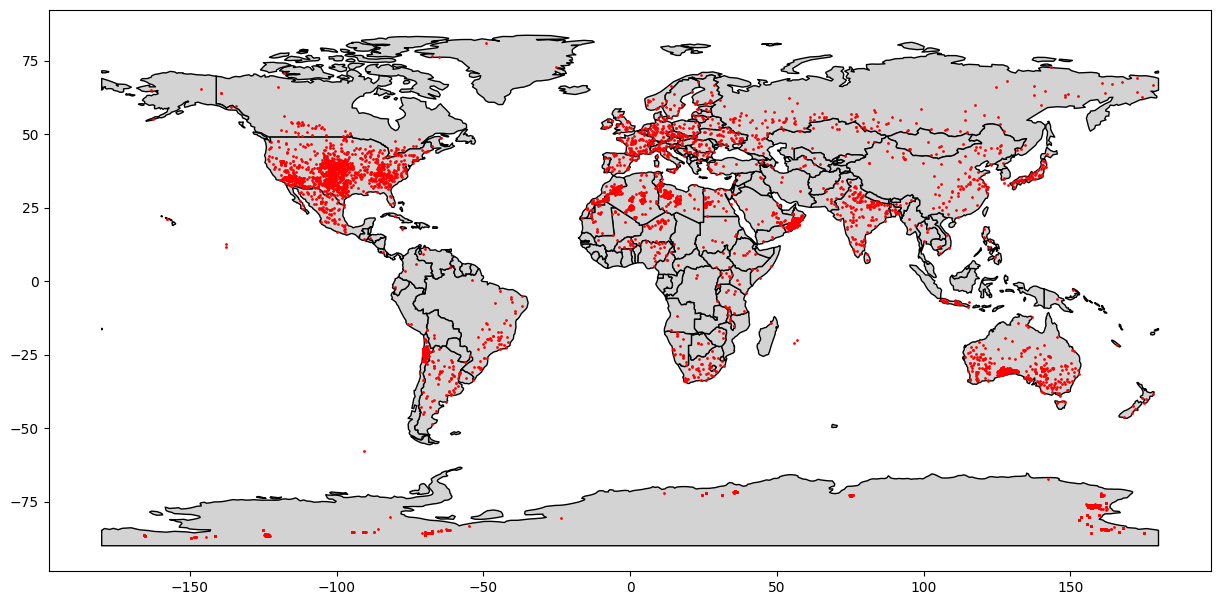

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


df = df[(df['reclat'] != 0) & (df['reclong'] != 0)]

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.reclong, df.reclat))

gdf.set_crs('EPSG:4326', inplace=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(gdf.crs)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=1)  # Zmiana 'markersize' zmienia wielkość punktów
plt.show()
